# import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# helper functions (if necessary)

In [2]:
#python code...

# read in training data

In [3]:
train_df = pd.read_csv("train.csv")
print(train_df)

      pixel_0001  pixel_0002  pixel_0003  pixel_0004  pixel_0005  pixel_0006  \
0        0.47226     0.48085     0.48761     0.49535     0.50379     0.51189   
1        0.32470     0.35060     0.37265     0.39171     0.40310     0.41359   
2        0.34084     0.36826     0.39206     0.40993     0.42216     0.43400   
3        0.37349     0.37682     0.38627     0.39756     0.40275     0.41260   
4        0.39495     0.40183     0.41210     0.42512     0.43305     0.44263   
...          ...         ...         ...         ...         ...         ...   
1745     0.36242     0.36768     0.37407     0.38544     0.39226     0.40214   
1746     0.34581     0.37402     0.39638     0.41495     0.42730     0.43788   
1747     0.48426     0.49024     0.49681     0.50646     0.51518     0.52343   
1748     0.46236     0.46905     0.47576     0.48341     0.49156     0.49815   
1749     0.36590     0.37389     0.38272     0.39427     0.40384     0.41482   

      pixel_0007  pixel_0008  pixel_000

# visualize sampling of training data

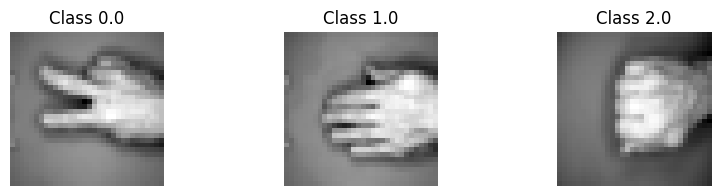

In [4]:
unique_classes = np.unique(train_df["class"].values)
fig, axes = plt.subplots(1, len(unique_classes), figsize=(10, 2))

for i, gesture_class in enumerate(unique_classes):
    sample = train_df[train_df["class"] == gesture_class].sample(1)
    img_data = sample.drop("class", axis=1).to_numpy().reshape(32, 32)
    axes[i].imshow(img_data, cmap="gray")
    axes[i].set_title(f"Class {gesture_class}")
    axes[i].axis("off")
plt.show()

# process training data 

In [5]:
X_train = train_df.drop("class", axis=1).to_numpy().reshape(-1, 32, 32, 1) / 255.0

y_train = np_utils.to_categorical(train_df["class"].values)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# experiment with training classification models

In [20]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(len(unique_classes), activation='softmax'))

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(len(unique_classes), activation='softmax'))

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='tanh', input_shape=(32, 32, 1)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, kernel_size=(3, 3), activation='tanh'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='tanh'))
model3.add(Dropout(0.5))
model3.add(Dense(len(unique_classes), activation='softmax'))

models = [model1, model2, model3]
histories = []

for model in models:
    model_name = f"Model {i+1}"
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_val, y_val))
    histories.append(history)

    print(f"\n{model_name} - Training Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"{model_name} - Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}\n")

Epoch 1/10
35/35 [==============================] - 2s 19ms/step - loss: 1.1006 - accuracy: 0.3375 - val_loss: 1.0962 - val_accuracy: 0.3893
Epoch 2/10
35/35 [==============================] - 1s 14ms/step - loss: 1.0987 - accuracy: 0.3438 - val_loss: 1.0968 - val_accuracy: 0.3893
Epoch 3/10
35/35 [==============================] - 1s 15ms/step - loss: 1.0985 - accuracy: 0.3464 - val_loss: 1.0966 - val_accuracy: 0.3893
Epoch 4/10
35/35 [==============================] - 1s 14ms/step - loss: 1.0988 - accuracy: 0.3429 - val_loss: 1.0973 - val_accuracy: 0.3893
Epoch 5/10
35/35 [==============================] - 1s 16ms/step - loss: 1.0991 - accuracy: 0.3223 - val_loss: 1.0981 - val_accuracy: 0.3893
Epoch 6/10
35/35 [==============================] - 1s 17ms/step - loss: 1.0987 - accuracy: 0.3348 - val_loss: 1.0973 - val_accuracy: 0.3893
Epoch 7/10
35/35 [==============================] - 1s 15ms/step - loss: 1.0988 - accuracy: 0.3464 - val_loss: 1.0974 - val_accuracy: 0.3893
Epoch 8/10
35

# train "fresh" classification model

In [38]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/10
18/18 [==============================] - 2s 34ms/step - loss: 0.0573 - accuracy: 0.9843 - val_loss: 9.5318 - val_accuracy: 0.3333
Epoch 2/10
18/18 [==============================] - 0s 24ms/step - loss: 0.0251 - accuracy: 0.9913 - val_loss: 9.4591 - val_accuracy: 0.3333
Epoch 3/10
18/18 [==============================] - 0s 23ms/step - loss: 0.0121 - accuracy: 0.9983 - val_loss: 11.0413 - val_accuracy: 0.3333
Epoch 4/10
18/18 [==============================] - 0s 22ms/step - loss: 0.0105 - accuracy: 0.9983 - val_loss: 12.1858 - val_accuracy: 0.3333
Epoch 5/10
18/18 [==============================] - 0s 22ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 11.0637 - val_accuracy: 0.3333
Epoch 6/10
18/18 [==============================] - 0s 22ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 10.6475 - val_accuracy: 0.3333
Epoch 7/10
18/18 [==============================] - 0s 22ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 10.9307 - val_accuracy: 0.3333
Epoch 8/

# read in test data

In [39]:
test_df = pd.read_csv("test.csv")
print(test_df)

     pixel_0001  pixel_0002  pixel_0003  pixel_0004  pixel_0005  pixel_0006  \
0       0.33171     0.35593     0.37523     0.39313     0.40558     0.41821   
1       0.37730     0.38290     0.39059     0.40225     0.40914     0.42137   
2       0.38589     0.39247     0.40290     0.41494     0.42391     0.43380   
3       0.38795     0.39150     0.39761     0.41051     0.41948     0.42885   
4       0.39611     0.39904     0.40116     0.40705     0.41105     0.41808   
..          ...         ...         ...         ...         ...         ...   
433     0.39040     0.39370     0.40026     0.41143     0.41842     0.42685   
434     0.45206     0.45821     0.46649     0.47841     0.48835     0.49878   
435     0.39253     0.39364     0.40122     0.41295     0.42002     0.42926   
436     0.45785     0.46063     0.45857     0.45420     0.46073     0.47128   
437     0.37256     0.37752     0.38363     0.39538     0.40344     0.41139   

     pixel_0007  pixel_0008  pixel_0009  pixel_0010

# process test data

In [40]:
X_test = test_df.to_numpy().reshape(-1, 32, 32, 1) / 255.0

# use trained model to predict test data

In [41]:
y_test_pred = model3.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)

14/14 [==============================] - 0s 9ms/step


# visualize random test samples with prediction

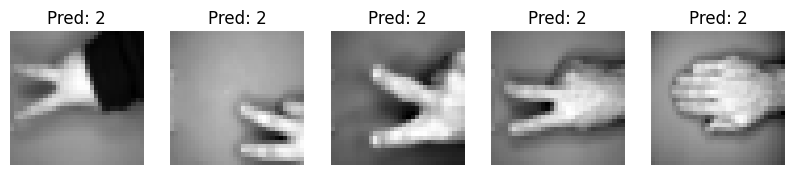

In [42]:
num_samples = 5
random_samples = np.random.choice(len(X_test), num_samples)

fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))

for i, sample_idx in enumerate(random_samples):
    axes[i].imshow(X_test[sample_idx].reshape(32, 32), cmap="gray")
    axes[i].set_title(f"Pred: {y_test_pred[sample_idx]}")
    axes[i].axis("off")
plt.show()

# write predicted test data to \<YourLastName>.csv

In [43]:
predictions_df = test_df.copy()
predictions_df["class"] = y_test_pred
predictions_df.to_csv("Rakowicz.csv", index=False)